# Topic Modeling 
Topic modeling is a probabilistic model which contains information about topics in the text. In this lab, we're interested in generating the topic models of the NLTK corpus Gutenberg, and discussing the performance and differences of the following methods of topic modeling : 
+ Dirichlet Allocation (LDA). 
+ Latent semantic analysis (LSA).
+ Hierarchical Dirichlet Process (HDP).

In [1]:
# imports
from nltk.corpus import gutenberg
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from gensim import corpora, models
import gensim
import spacy
nlp = spacy.load("en_core_web_sm")

In [2]:
# we chose some of the texts available on the NLTK gutenberg corpus which constitutes of english litterature novels.
text_names = ["austen-emma.txt", 
              "shakespeare-macbeth.txt" ,
              "shakespeare-hamlet.txt",
              "chesterton-ball.txt"]  

documents = []
# we create a list of our custom stopwords
my_stop_words = [u'say', u'\'s', u'Mr', u'be', u'said', u'says', u'saying', u'would',  u'could']

# we do some preprocessing on our corpus, which includes the tokenization, lower casing, 
# removal of spacy stopwords and our custom stopwords, removal of punctuation and special characters.
for text_name in text_names:
    text = gutenberg.raw(text_name)
    tokens = word_tokenize(text)
    filtered_tokens = [token.lower() for token in tokens if token.lower() not in stopwords.words('english') and token.isalpha() and token.lower() not in my_stop_words]
    doc = nlp(" ".join(filtered_tokens))
    lemmatized_tokens = [token.lemma_ for token in doc]
    
    documents.append(lemmatized_tokens)

In [3]:
# create a dictionary of our corpus
dictionary = corpora.Dictionary(documents)
# save the dictionary in a txt file
dictionary.save_as_text("old_dictionary.txt")
print(len(dictionary))

12250


In [4]:
# transform the corpus into a bag of words dictionary
corpus = [dictionary.doc2bow(doc) for doc in documents]
corpus

[[(0, 24),
  (1, 1),
  (2, 1),
  (3, 2),
  (4, 1),
  (5, 3),
  (6, 71),
  (7, 1),
  (8, 1),
  (9, 7),
  (10, 8),
  (11, 3),
  (12, 5),
  (13, 1),
  (14, 16),
  (15, 10),
  (16, 1),
  (17, 2),
  (18, 4),
  (19, 33),
  (20, 1),
  (21, 1),
  (22, 1),
  (23, 3),
  (24, 5),
  (25, 1),
  (26, 1),
  (27, 2),
  (28, 1),
  (29, 1),
  (30, 6),
  (31, 28),
  (32, 8),
  (33, 2),
  (34, 1),
  (35, 1),
  (36, 3),
  (37, 2),
  (38, 2),
  (39, 8),
  (40, 1),
  (41, 9),
  (42, 11),
  (43, 2),
  (44, 3),
  (45, 6),
  (46, 1),
  (47, 4),
  (48, 1),
  (49, 60),
  (50, 1),
  (51, 1),
  (52, 1),
  (53, 2),
  (54, 1),
  (55, 2),
  (56, 1),
  (57, 1),
  (58, 2),
  (59, 1),
  (60, 31),
  (61, 6),
  (62, 26),
  (63, 63),
  (64, 7),
  (65, 1),
  (66, 5),
  (67, 4),
  (68, 2),
  (69, 7),
  (70, 1),
  (71, 1),
  (72, 7),
  (73, 1),
  (74, 25),
  (75, 1),
  (76, 7),
  (77, 7),
  (78, 4),
  (79, 3),
  (80, 29),
  (81, 2),
  (82, 1),
  (83, 2),
  (84, 49),
  (85, 10),
  (86, 4),
  (87, 23),
  (88, 2),
  (89, 2),
  (9

In [5]:
# creation of bigrams and trigrams
bigram = gensim.models.Phrases(documents)
trigram= gensim.models.Phrases(bigram[documents]) 

In [6]:
# add the created bigrams and trigrams to our documents
documents = [bigram[line] for line in documents]
documents = [trigram[line] for line in documents]
documents

[['emma',
  'jane',
  'austen',
  'volume',
  'chapter',
  'emma',
  'woodhouse',
  'handsome',
  'clever',
  'rich',
  'comfortable',
  'home',
  'happy',
  'disposition',
  'seem',
  'unite',
  'good',
  'blessing',
  'existence',
  'live',
  'nearly',
  'year',
  'world',
  'little',
  'distress',
  'vex',
  'young',
  'two',
  'daughter',
  'affectionate',
  'indulgent',
  'father',
  'consequence',
  'sister',
  'marriage',
  'mistress',
  'house',
  'early',
  'period',
  'mother',
  'die',
  'long',
  'ago',
  'indistinct',
  'remembrance',
  'caress',
  'place',
  'supply',
  'excellent',
  'woman',
  'governess',
  'fall',
  'little',
  'short',
  'mother',
  'affection',
  'sixteen',
  'year',
  'miss_taylor',
  'woodhouse',
  'family',
  'less',
  'governess',
  'friend',
  'fond',
  'daughter',
  'particularly',
  'emma',
  'intimacy',
  'sister',
  'even',
  'miss_taylor',
  'cease',
  'hold',
  'nominal',
  'office',
  'governess',
  'mildness',
  'temper',
  'hardly',
  

In [7]:
# create the dictionary of the new corpus
dictionary = corpora.Dictionary(documents)
dictionary.save_as_text("new_dictionary.txt")

In [8]:
# transform it into bag of words
corpus = [dictionary.doc2bow(text) for text in documents]
# print the new form of our corpus
for doc in corpus:
    print(doc)

print(len(dictionary))


[(0, 15), (1, 1), (2, 1), (3, 2), (4, 1), (5, 3), (6, 65), (7, 6), (8, 1), (9, 1), (10, 7), (11, 8), (12, 3), (13, 5), (14, 1), (15, 16), (16, 10), (17, 1), (18, 2), (19, 4), (20, 33), (21, 1), (22, 1), (23, 1), (24, 3), (25, 5), (26, 1), (27, 1), (28, 2), (29, 1), (30, 1), (31, 6), (32, 28), (33, 8), (34, 2), (35, 1), (36, 1), (37, 3), (38, 2), (39, 2), (40, 8), (41, 1), (42, 9), (43, 11), (44, 2), (45, 3), (46, 6), (47, 1), (48, 4), (49, 1), (50, 60), (51, 1), (52, 1), (53, 1), (54, 2), (55, 1), (56, 2), (57, 1), (58, 1), (59, 2), (60, 1), (61, 31), (62, 6), (63, 26), (64, 56), (65, 7), (66, 1), (67, 5), (68, 4), (69, 2), (70, 7), (71, 1), (72, 1), (73, 3), (74, 1), (75, 1), (76, 25), (77, 1), (78, 7), (79, 7), (80, 4), (81, 3), (82, 29), (83, 2), (84, 1), (85, 2), (86, 49), (87, 10), (88, 4), (89, 23), (90, 2), (91, 2), (92, 1), (93, 1), (94, 1), (95, 6), (96, 2), (97, 3), (98, 1), (99, 24), (100, 27), (101, 2), (102, 5), (103, 2), (104, 1), (105, 24), (106, 4), (107, 1), (108, 2), 

In [9]:
# import of the models
from gensim.models import CoherenceModel, LdaModel, LsiModel, HdpModel

In [10]:
# application of the LSI mdoel with num_topics = 10
lsimodel = LsiModel(corpus=corpus, num_topics=10, id2word=dictionary)

In [22]:
lsimodel.show_topics(num_topics=4)  # Showing only the top 4 topics

[(0,
  '0.240*"emma" + 0.217*"think" + 0.195*"well" + 0.190*"know" + 0.188*"must" + 0.178*"one" + 0.164*"see" + 0.151*"much" + 0.147*"make" + 0.141*"come"'),
 (1,
  '0.393*"turnbull" + 0.332*"macian" + 0.277*"man" + -0.239*"emma" + 0.213*"like" + -0.139*"harriet" + -0.135*"weston" + 0.128*"one" + 0.119*"god" + -0.117*"elton"'),
 (2,
  '0.363*"ham" + 0.285*"haue" + 0.260*"king" + 0.158*"shall" + 0.156*"lord" + 0.149*"thy" + 0.141*"come" + 0.139*"let" + 0.138*"thou" + 0.121*"loue"'),
 (3,
  '0.429*"macb" + -0.393*"ham" + 0.191*"macd" + 0.162*"rosse" + 0.148*"macbeth" + 0.133*"lady" + 0.129*"banquo" + 0.126*"yet" + -0.126*"hor" + 0.126*"enter"')]

In [12]:
# application du model HDP
hdpmodel = HdpModel(corpus=corpus, id2word=dictionary)

In [13]:
# affichage de tous les topic générés (20 dans ce cas)
hdpmodel.show_topics()

[(0,
  '0.012*emma + 0.010*think + 0.009*well + 0.009*must + 0.008*know + 0.007*much + 0.007*one + 0.007*harriet + 0.007*weston + 0.007*see + 0.006*make + 0.006*elton + 0.006*come + 0.005*little + 0.005*go + 0.005*good + 0.005*never + 0.005*give + 0.005*might + 0.005*thing'),
 (1,
  '0.013*turnbull + 0.011*macian + 0.011*man + 0.009*like + 0.009*one + 0.007*see + 0.006*go + 0.006*come + 0.005*know + 0.005*thing + 0.005*look + 0.005*two + 0.004*seem + 0.004*make + 0.004*face + 0.004*think + 0.004*quite + 0.004*god + 0.004*well + 0.004*even'),
 (2,
  '0.017*ham + 0.011*king + 0.010*haue + 0.009*come + 0.007*shall + 0.007*make + 0.007*lord + 0.007*let + 0.006*well + 0.006*thy + 0.006*good + 0.006*hor + 0.005*oh + 0.005*like + 0.005*go + 0.005*loue + 0.005*hamlet + 0.005*know + 0.005*thou + 0.005*giue'),
 (3,
  '0.014*macb + 0.011*haue + 0.007*come + 0.007*shall + 0.007*thou + 0.006*thee + 0.006*make + 0.006*king + 0.006*enter + 0.006*vpon + 0.006*macd + 0.006*yet + 0.005*hath + 0.005*thy 

In [14]:
# application du modele LDA avec num_topic = 5
ldamodel = LdaModel(corpus=corpus, num_topics=5, id2word=dictionary)

In [15]:
# affichage des 5 topic générés
ldamodel.show_topics()

[(0,
  '0.007*"well" + 0.006*"like" + 0.006*"make" + 0.005*"come" + 0.005*"emma" + 0.005*"go" + 0.005*"see" + 0.005*"ham" + 0.005*"man" + 0.004*"know"'),
 (1,
  '0.008*"one" + 0.005*"see" + 0.005*"man" + 0.005*"think" + 0.005*"must" + 0.005*"know" + 0.005*"well" + 0.005*"like" + 0.005*"come" + 0.004*"go"'),
 (2,
  '0.008*"think" + 0.007*"must" + 0.007*"know" + 0.007*"well" + 0.006*"see" + 0.006*"emma" + 0.006*"make" + 0.005*"go" + 0.005*"come" + 0.005*"one"'),
 (3,
  '0.007*"one" + 0.007*"know" + 0.007*"well" + 0.007*"emma" + 0.007*"think" + 0.006*"must" + 0.006*"make" + 0.006*"man" + 0.006*"come" + 0.005*"see"'),
 (4,
  '0.007*"come" + 0.007*"one" + 0.006*"see" + 0.006*"like" + 0.006*"know" + 0.006*"think" + 0.005*"turnbull" + 0.005*"much" + 0.005*"man" + 0.005*"emma"')]

In [16]:
import pyLDAvis
import pyLDAvis.gensim_models  

#  visualisation interactive des topics extraits du corpus par le modèle LDA en utilisant pyLDAvis

prepared_data = pyLDAvis.gensim_models.prepare(ldamodel, corpus, dictionary)
pyLDAvis.display(prepared_data)

In [ ]:
# calcul de la coherence de chaque modele pour comparer leurs performances 

In [17]:
lsitopics = [[word for word, prob in topic] for topicid, topic in lsimodel.show_topics(formatted=False)]

hdptopics = [[word for word, prob in topic] for topicid, topic in hdpmodel.show_topics(formatted=False)]

ldatopics = [[word for word, prob in topic] for topicid, topic in ldamodel.show_topics(formatted=False)]

In [18]:
lsi_coherence = CoherenceModel(topics=lsitopics[:10], texts=documents, dictionary=dictionary, window_size=10).get_coherence()

hdp_coherence = CoherenceModel(topics=hdptopics[:10], texts=documents, dictionary=dictionary, window_size=10).get_coherence()

lda_coherence = CoherenceModel(topics=ldatopics, texts=documents, dictionary=dictionary, window_size=10).get_coherence()

In [19]:
import matplotlib.pyplot as plt
import numpy as np

In [20]:
# histogramme des coherences de chaque modele
def evaluate_bar_graph(coherences, indices):
    """
    Function to plot bar graph.
    
    coherences: list of coherence values
    indices: Indices to be used to mark bars. Length of this and coherences should be equal.
    """
    assert len(coherences) == len(indices)
    n = len(coherences)
    x = np.arange(n)
    plt.bar(x, coherences, width=0.2, tick_label=indices, align='center')
    plt.xlabel('Models')
    plt.ylabel('Coherence Value')

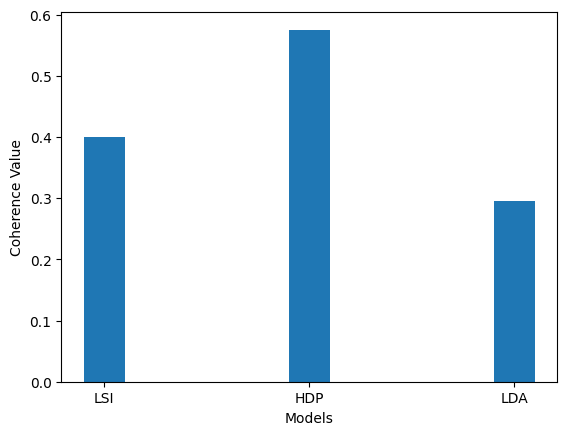

In [21]:
evaluate_bar_graph([lsi_coherence, hdp_coherence, lda_coherence],
                   ['LSI', 'HDP', 'LDA'])